#Dataset Labeling and setting

Importing the Packages!!


In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

**what kinds of classes are in this dataset**

In [ ]:
dataset_path = os.listdir('/content/dataset')
print (dataset_path)  
print("Types of classes labels found: ", len(dataset_path))

['1', '2', '3']
Types of classes labels found:  3


In [ ]:
class_labels = []

for item in dataset_path:
 all_classes = os.listdir('dataset' + '/' +item)
 print(all_classes)

 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    print(class_labels[:5])

['2476.png', '2920.png', '2470.png', '2583.png', '2584.png', '2903.png', '2587.png', '2766.png', '2929.png', '457.png', '2351.png', '2481.png', '2872.png', '2847.png', '2915.png', '2665.png', '2965.png', '2808.png', '2362.png', '2674.png', '2599.png', '2349.png', '2431.png', '2307.png', '2479.png', '2930.png', '2527.png', '2592.png', '2832.png', '2497.png', '2501.png', '2789.png', '2775.png', '2643.png', '2861.png', '3043.png', '2417.png', '2839.png', '3044.png', '2997.png', '2673.png', '2346.png', '2320.png', '2964.png', '2368.png', '2625.png', '2785.png', '2475.png', '2355.png', '2427.png', '2375.png', '2859.png', '2426.png', '2369.png', '2373.png', '2776.png', '2870.png', '2671.png', '2329.png', '2977.png', '2446.png', '2406.png', '2691.png', '2958.png', '2777.png', '2699.png', '2542.png', '3047.png', '2448.png', '2771.png', '2892.png', '3035.png', '2343.png', '3024.png', '2361.png', '3018.png', '2854.png', '2818.png', '2940.png', '2585.png', '2927.png', '2990.png', '2938.png', '277

In [ ]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                    image
0      1  dataset_path/1/2476.png
1      1  dataset_path/1/2920.png
2      1  dataset_path/1/2470.png
3      1  dataset_path/1/2583.png
4      1  dataset_path/1/2584.png
     Labels                    image
3059      3  dataset_path/3/1725.png
3060      3   dataset_path/3/993.png
3061      3  dataset_path/3/2224.png
3062      3   dataset_path/3/931.png
3063      3  dataset_path/3/2142.png


In [ ]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  3064
2    1426
3     930
1     708
Name: Labels, dtype: int64


# Image Resizing

In [ ]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(3064, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['1' '1' '1' ... '3' '3' '3']
[0 0 0 ... 2 2 2]


In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
print(Y.shape)
images.shape

(3064, 3)


(3064, 224, 224, 3)

# Training and Testing data Split

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(2451, 224, 224, 3)
(2451, 3)
(613, 224, 224, 3)
(613, 3)


**bold text**# New Section

# VGG Implementation on the Dataset

In [ ]:
from __future__ import print_function
import numpy as np
import warnings
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
def VGGupdated(input_tensor=None,classes=3):    
   
    img_rows, img_cols = 224, 224  
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    model = Model(inputs = img_input, outputs = x, name='VGGdemo')
    return model

In [ ]:
model = VGGupdated(classes = 3) # Meningioma, Glioma and Pituitary are our types
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_path = os.listdir('dataset')

tumor_types = os.listdir('dataset')
print (tumor_types)  #what kinds of tumor are in our dataset

print("Types of tumor found: ", len(dataset_path))

['1', '2', '3']
Types of tumor found:  3


In [ ]:
# Let's check how many samples for each category are present
print("Total number of tumor in the dataset: ", len(tumor_df))
tumor_count = tumor_df['tumor type'].value_counts()
print("tumor in each category: ")
print(tumor_count)

Total number of rooms in the dataset:  3064
rooms in each category: 
2    1426
3     930
1     708
Name: room type, dtype: int64


In [ ]:
import cv2
path = 'dataset/'


im_size = 224

images = []
labels = []

for i in tumor_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape    

(3064, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=tumor_df['tumor type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[2 2 2 ... 0 0 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

y=y.reshape(-1,1)
#onehotencoder = OneHotEncoder(categorical_features=[0])  
Y= onehotencoder.fit_transform(y)
Y.shape 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],remainder='passthrough')
Y=np.array(columnTransformer.fit_transform(y),dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2910, 224, 224, 3)
(2910, 3)
(154, 224, 224, 3)
(154, 3)


In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32)  

Epoch 1/10
91/91 [==============================] - 30s 327ms/step - loss: 1.4668 - accuracy: 0.4375
Epoch 2/10
91/91 [==============================] - 28s 308ms/step - loss: 1.1414 - accuracy: 0.4423
Epoch 3/10
91/91 [==============================] - 28s 310ms/step - loss: 1.1246 - accuracy: 0.4436
Epoch 4/10
91/91 [==============================] - 28s 310ms/step - loss: 1.1102 - accuracy: 0.4464
Epoch 5/10
91/91 [==============================] - 28s 310ms/step - loss: 1.1141 - accuracy: 0.4450
Epoch 6/10
91/91 [==============================] - 28s 309ms/step - loss: 1.1069 - accuracy: 0.4533
Epoch 7/10
91/91 [==============================] - 28s 309ms/step - loss: 1.1082 - accuracy: 0.4550
Epoch 8/10
91/91 [==============================] - 28s 312ms/step - loss: 1.1387 - accuracy: 0.4399
Epoch 9/10
91/91 [==============================] - 28s 309ms/step - loss: 1.0891 - accuracy: 0.4536
Epoch 10/10
91/91 [==============================] - 28s 309ms/step - loss: 1.1059 - accura

In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32)  

Epoch 1/10
91/91 [==============================] - 104s 944ms/step - loss: 1.1250 - accuracy: 0.4564
Epoch 2/10
91/91 [==============================] - 77s 849ms/step - loss: 1.0580 - accuracy: 0.4674
Epoch 3/10
91/91 [==============================] - 77s 846ms/step - loss: 1.0590 - accuracy: 0.4674
Epoch 4/10
91/91 [==============================] - 77s 846ms/step - loss: 1.0571 - accuracy: 0.4674
Epoch 5/10
91/91 [==============================] - 77s 842ms/step - loss: 1.0578 - accuracy: 0.4674
Epoch 6/10
91/91 [==============================] - 77s 841ms/step - loss: 1.0579 - accuracy: 0.4674
Epoch 7/10
91/91 [==============================] - 76s 840ms/step - loss: 1.0574 - accuracy: 0.4674
Epoch 8/10
91/91 [==============================] - 76s 840ms/step - loss: 1.0573 - accuracy: 0.4674
Epoch 9/10
91/91 [==============================] - 76s 838ms/step - loss: 1.0570 - accuracy: 0.4674
Epoch 10/10
91/91 [==============================] - 76s 838ms/step - loss: 1.0568 - accur

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

# Implementation of Resnet 50

In [ ]:
#Resnet..............................................................
import keras
from keras.models import Sequential
import tensorflow
from keras.layers import Activation, Dense

In [ ]:
resnet_model= Sequential()
pretrained_model= tf.keras.applications.ResNet50(
                  include_top=False,
                  weights='imagenet',
                  input_tensor=None,
                  input_shape=(224, 224, 3),
                  pooling="avg",
                  classes=3
                  
                )
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Dense(4096,activation='relu'))
resnet_model.add(Dense(2048,activation='relu'))
resnet_model.add(Dense(1024,activation='relu'))
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(256,activation='relu'))
resnet_model.add(Dense(3,activation='softmax'))


resnet_model.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4096)              8392704   
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                         

In [ ]:
from tensorflow.keras.optimizers import Adam
resnet_model.compile(optimizer="Adagrad",loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
#epochs=5
history=resnet_model.fit(train_x,train_y,30)

82/82 [==============================] - 31s 217ms/step - loss: 1.0659 - accuracy: 0.4557


# Implementing Efficientnet B0 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# Using model without transfer learning
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

**B0 model starts**

In [ ]:
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)
from tensorflow import keras
model.save_weights('model.h5')

Epoch 1/30
77/77 - 33s - loss: 0.1236 - accuracy: 0.9657 - 33s/epoch - 423ms/step
Epoch 2/30
77/77 - 24s - loss: 0.2130 - accuracy: 0.9441 - 24s/epoch - 306ms/step
Epoch 3/30
77/77 - 23s - loss: 0.1271 - accuracy: 0.9535 - 23s/epoch - 302ms/step
Epoch 4/30
77/77 - 24s - loss: 0.0943 - accuracy: 0.9694 - 24s/epoch - 310ms/step
Epoch 5/30
77/77 - 24s - loss: 0.0965 - accuracy: 0.9727 - 24s/epoch - 307ms/step
Epoch 6/30
77/77 - 24s - loss: 0.0490 - accuracy: 0.9816 - 24s/epoch - 306ms/step
Epoch 7/30
77/77 - 24s - loss: 0.0373 - accuracy: 0.9906 - 24s/epoch - 308ms/step
Epoch 8/30
77/77 - 24s - loss: 0.0271 - accuracy: 0.9927 - 24s/epoch - 307ms/step
Epoch 9/30
77/77 - 24s - loss: 0.0368 - accuracy: 0.9882 - 24s/epoch - 308ms/step
Epoch 10/30
77/77 - 24s - loss: 0.0388 - accuracy: 0.9869 - 24s/epoch - 307ms/step
Epoch 11/30
77/77 - 24s - loss: 0.0318 - accuracy: 0.9890 - 24s/epoch - 306ms/step
Epoch 12/30
77/77 - 23s - loss: 0.0194 - accuracy: 0.9943 - 23s/epoch - 305ms/step
Epoch 13/30
7

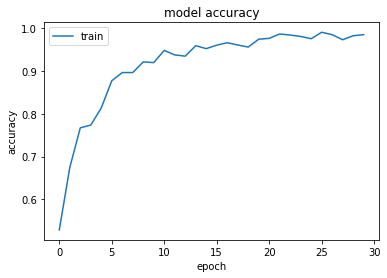

In [ ]:
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20/20 [==============================] - 3s 66ms/step - loss: 5.1936 - accuracy: 0.6297
Loss = 5.19360876083374
Test Accuracy = 0.6296900510787964


#Testing Efficiency on the unseen Data

In [ ]:
#Testing Efficiency on the unseen Data

Input image shape: (1, 224, 224, 3)


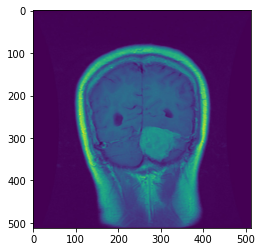

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

array([[0., 0., 1.]], dtype=float32)

# Implementation of Efficientnet B3

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3

In [ ]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 260

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
#This model takes input images of shape (380, 380, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 260.0
images.shape

(3064, 260, 260, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['2' '2' '2' ... '1' '1' '1']
[1 1 1 ... 0 0 0]


In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
print(Y.shape)
images.shape

(3064, 3)


(3064, 260, 260, 3)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2451, 260, 260, 3)
(2451, 3)
(613, 260, 260, 3)
(613, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2

NUM_CLASSES = 3
IMG_SIZE = 260
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# Using model without transfer learning
outputs = EfficientNetB2(include_top=True, weights=None, drop_connect_rate=0.4,classes=NUM_CLASSES)(inputs)